In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
url = '/content/sample_data/Filtered_Phenotypic_Data.csv'  # Replace with your file path or URL
data = pd.read_csv(url)

# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(include=['object']).columns.tolist()

# Extract non-numeric columns before dropping them
data_non_numeric = data[non_numeric_cols]

# Drop the non-numeric columns from the main DataFrame
data.drop(non_numeric_cols, axis=1, inplace=True)

# Encode the non-numeric values using one-hot encoding
data_non_numeric_encoded = pd.get_dummies(data_non_numeric, columns=non_numeric_cols)

# Concatenate the encoded non-numeric data with the numeric data
data = pd.concat([data, data_non_numeric_encoded], axis=1)

# Separate features (X) and target variable (y)
X = data.drop(columns=['DX_GROUP'])
y = data['DX_GROUP']

# Encode the target variable if necessary
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check shapes
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (707, 902)
X_test shape: (177, 902)
y_train shape: (707,)
y_test shape: (177,)


In [3]:
# Build the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

Accuracy: 52.54%
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        84
           2       0.53      1.00      0.69        93

    accuracy                           0.53       177
   macro avg       0.26      0.50      0.34       177
weighted avg       0.28      0.53      0.36       177



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


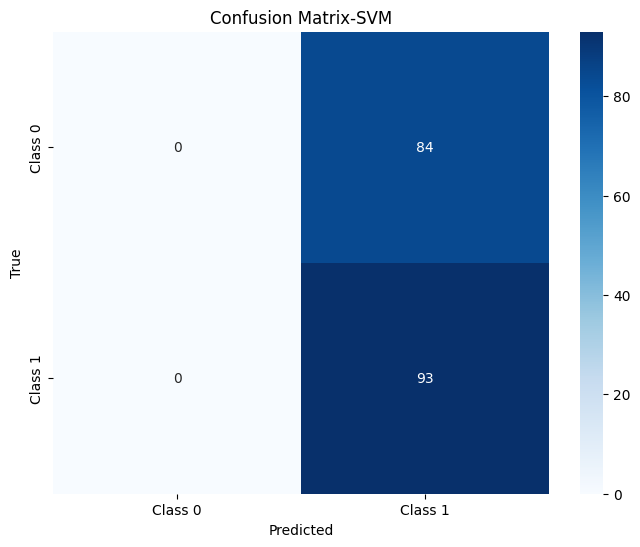

Precision: 0.2760700948003448
Recall: 0.5254237288135594
F1 Score: 0.3619585687382298


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# Predict on the test set
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-SVM')
plt.show()

# Calculate additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


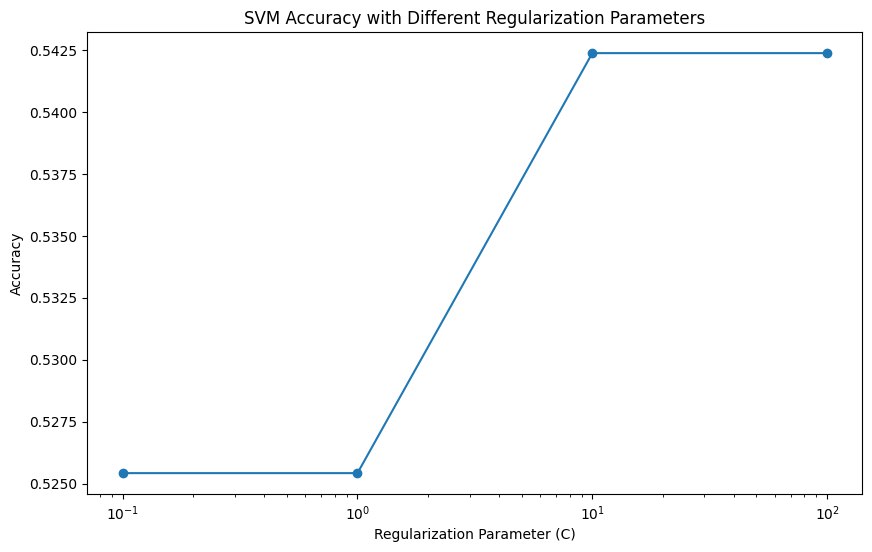

In [6]:
# Sample plot of accuracy with different regularization parameters
regularization_params = [0.1, 1, 10, 100]
accuracy_scores = []

for param in regularization_params:
    model = SVC(C=param, kernel='rbf', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(regularization_params, accuracy_scores, marker='o')
plt.title('SVM Accuracy with Different Regularization Parameters')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()
